<a href="https://colab.research.google.com/github/DenisaArtean/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [ ]:
data_first = pd.read_csv("/content/gdrive/MyDrive/diabetes.csv")
data_first.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data = data_first.drop(columns = "DiabetesPedigreeFunction")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


# Input variables

**Pregnancies**: Number of times pregnant 

**Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure** : Diastolic blood pressure (mm Hg)

**SkinThickness** : Triceps skin fold thickness (mm)

**Insulin** : 2-Hour serum insulin (mu U/ml)

**BMI** : Body mass index (weight in kg/(height in m)^2)

**Age**

**Outcome**





# Data exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [ ]:
data.shape

(768, 8)

In [ ]:
data.Outcome.value_counts()  # to see how many positive and negative samples there are

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.axis.XTick at 0x7f3eff00ff50>,
 [Text(0, 0, 'No Diabetes'), Text(0, 0, 'Diabetes')])

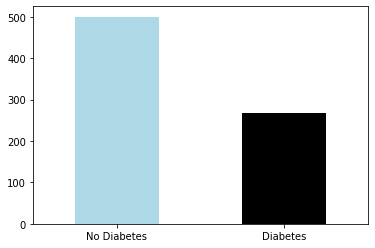

In [ ]:
data.Outcome.value_counts().plot(kind="bar", color=["lightblue", "black"])
plt.xticks(np.arange(2), ("No Diabetes", "Diabetes"), rotation = 0)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


Text(0, 0.5, 'Blood Pressure')

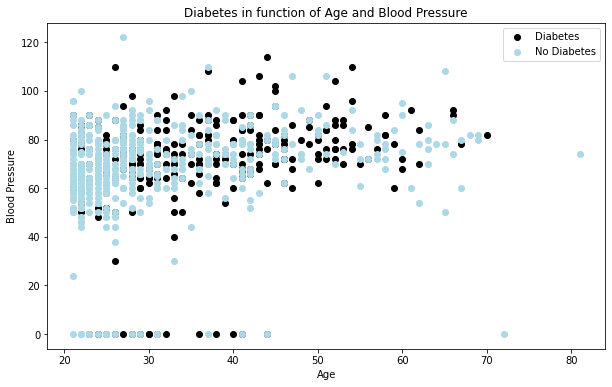

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Age[data.Outcome==1], 
            data.BloodPressure[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Age[data.Outcome==0], 
            data.BloodPressure[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Blood Pressure")

Text(0, 0.5, 'Insulin')

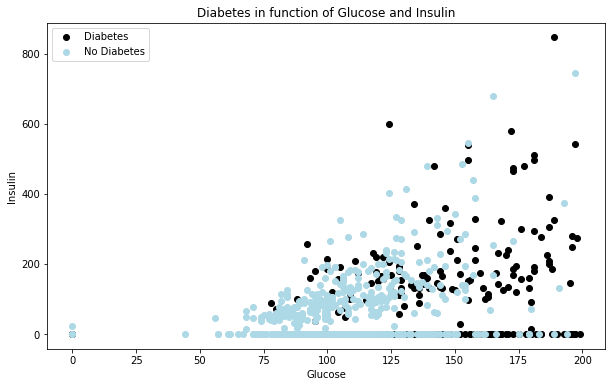

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Glucose[data.Outcome==1], 
            data.Insulin[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Glucose[data.Outcome==0], 
            data.Insulin[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Glucose and Insulin")
plt.xlabel("Glucose")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Insulin")

Text(0, 0.5, 'BMI')

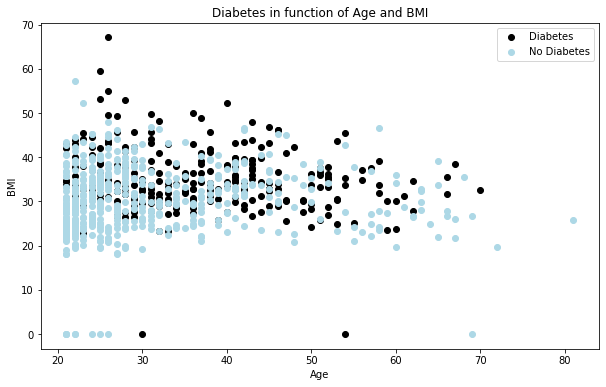

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Age[data.Outcome==1], 
            data.BMI[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Age[data.Outcome==0], 
            data.BMI[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("BMI")

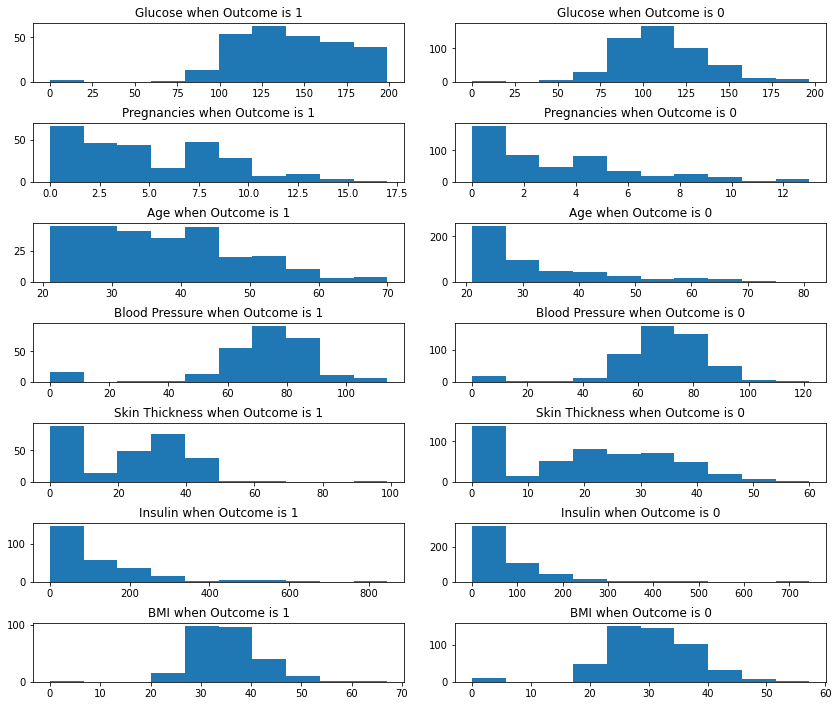

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 10))
fig.tight_layout(pad = 2.0)
ax[0,0].set_title('Glucose when Outcome is 1')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Glucose when Outcome is 0')
ax[0,1].hist(data.Glucose[data.Outcome==0]);

ax[1,0].set_title('Pregnancies when Outcome is 1')
ax[1,0].hist(data.Pregnancies[data.Outcome==1]);
ax[1,1].set_title('Pregnancies when Outcome is 0')
ax[1,1].hist(data.Pregnancies[data.Outcome==0]);

ax[2,0].set_title('Age when Outcome is 1')
ax[2,0].hist(data.Age[data.Outcome==1]);
ax[2,1].set_title('Age when Outcome is 0')
ax[2,1].hist(data.Age[data.Outcome==0]);

ax[3,0].set_title('Blood Pressure when Outcome is 1')
ax[3,0].hist(data.BloodPressure[data.Outcome==1]);
ax[3,1].set_title('Blood Pressure when Outcome is 0')
ax[3,1].hist(data.BloodPressure[data.Outcome==0]);

ax[4,0].set_title('Skin Thickness when Outcome is 1')
ax[4,0].hist(data.SkinThickness[data.Outcome==1]);
ax[4,1].set_title('Skin Thickness when Outcome is 0')
ax[4,1].hist(data.SkinThickness[data.Outcome==0]);

ax[5,0].set_title('Insulin when Outcome is 1')
ax[5,0].hist(data.Insulin[data.Outcome==1]);
ax[5,1].set_title('Insulin when Outcome is 0')
ax[5,1].hist(data.Insulin[data.Outcome==0]);

ax[6,0].set_title('BMI when Outcome is 1')
ax[6,0].hist(data.BMI[data.Outcome==1]);
ax[6,1].set_title('BMI when Outcome is 0')
ax[6,1].hist(data.BMI[data.Outcome==0]);


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.238356,1.000000


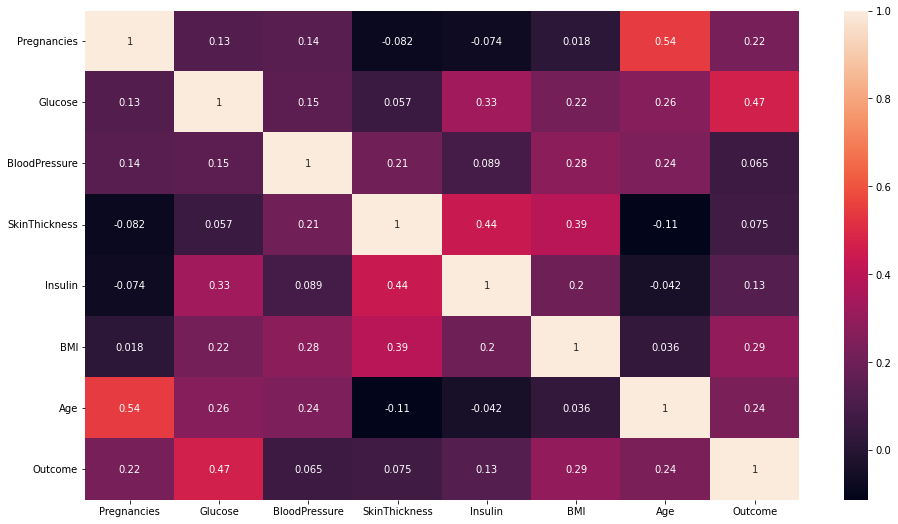

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#sns.pairplot(data, hue='Outcome')

# Data Cleaning

In [ ]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False


In [ ]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
data_clean = data.copy()

In [ ]:
print("Number of 0's for Glucose:", data_clean['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", data_clean['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", data_clean['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", data_clean['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", data_clean['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [ ]:
# Replacing 0 values in these columns with mean
data_clean['Glucose'] = data_clean['Glucose'].replace(0, data['Glucose'].mean())
data_clean['BloodPressure'] = data_clean['BloodPressure'].replace(0, data['BloodPressure'].mean())
data_clean['SkinThickness'] = data_clean['SkinThickness'].replace(0, data['SkinThickness'].mean())
data_clean['Insulin'] = data_clean['Insulin'].replace(0, data['Insulin'].mean())
data_clean['BMI'] = data_clean['BMI'].replace(0, data['BMI'].mean())

In [ ]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


Text(0, 0.5, 'BMI')

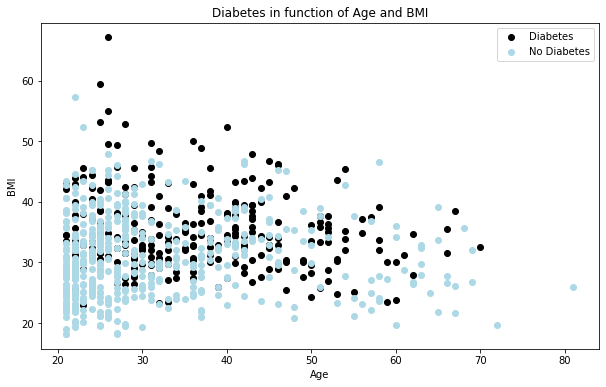

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data_clean.Age[data_clean.Outcome==1], 
            data_clean.BMI[data_clean.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data_clean.Age[data_clean.Outcome==0], 
            data_clean.BMI[data_clean.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("BMI")

Text(0, 0.5, 'Blood Pressure')

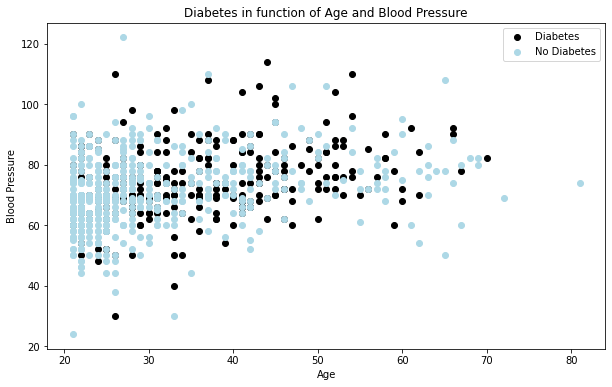

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data_clean.Age[data_clean.Outcome==1], 
            data_clean.BloodPressure[data_clean.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data_clean.Age[data_clean.Outcome==0], 
            data_clean.BloodPressure[data_clean.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Blood Pressure")

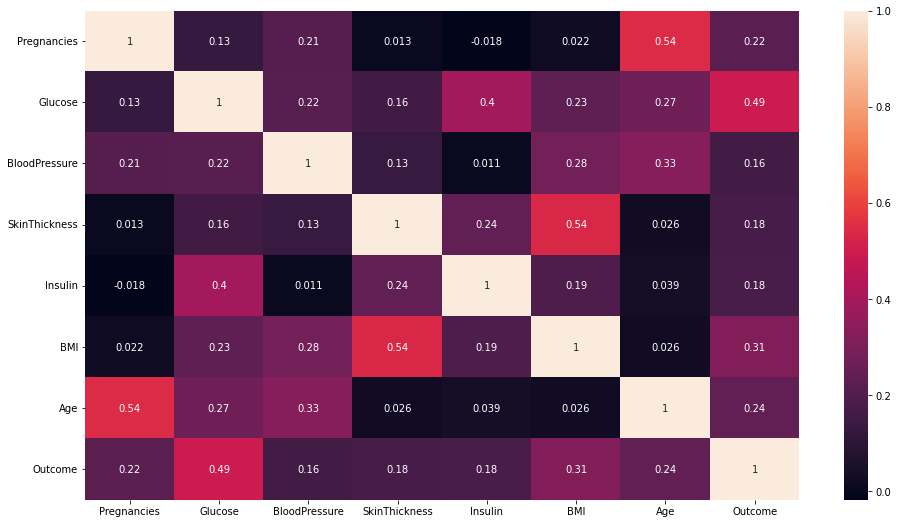

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(data_clean.corr(), annot=True)

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler


## Normal

**Train Test Split**

In [ ]:
#Spliting the data
X = data_clean[data_clean.columns[:7]]
y = data_clean.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
data_clean.columns[:7]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean[data_clean.columns[:7]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg.fit(X_train,y_train);

log_reg_pred_normal = log_reg.predict(X_test)

log_reg_normal_score = log_reg.score(X_test,y_test)
print(log_reg_normal_score)

0.7922077922077922


In [ ]:
log_reg_pred_normal

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
log_reg.coef_ 

array([[ 0.30525176,  1.13780468, -0.19322274, -0.01099434, -0.1253971 ,
         0.68023841,  0.21355252]])

In [ ]:
log_reg.intercept_ 

array([-0.80006281])

In [ ]:
mean_squared_error(y_test, log_reg_pred_normal)

0.2077922077922078

In [ ]:
print(classification_report(y_test, log_reg_pred_normal))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
print(confusion_matrix(y_test, log_reg_pred_normal))

[[96 11]
 [21 26]]


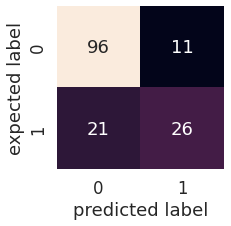

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, log_reg_pred_normal):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_reg_pred_normal),
                     annot=True,
                     cbar=False)
    plt.xlabel("predicted label")
    plt.ylabel("expected label")
    
plot_conf_mat(y_test, log_reg_pred_normal)

### Coeff

In [ ]:

clf = LogisticRegression()

clf.fit(X_train, y_train);

In [ ]:
import numpy as np

In [ ]:
feature_dict = dict(zip(data_clean.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.21355251648039394,
 'BMI': 0.6802384071996035,
 'BloodPressure': -0.19322274295913103,
 'Glucose': 1.1378046767678767,
 'Insulin': -0.1253970969863197,
 'Pregnancies': 0.3052517623178261,
 'SkinThickness': -0.010994342194261708}

In [ ]:
dict(zip(data_clean.columns, list(np.exp(clf.coef_[0]))))

{'Age': 1.2380685155617552,
 'BMI': 1.9743483749930306,
 'BloodPressure': 0.8242983470360197,
 'Glucose': 3.119911627084625,
 'Insulin': 0.8821465352936443,
 'Pregnancies': 1.3569665930593493,
 'SkinThickness': 0.9890658747021198}

In [ ]:
clf.coef_

array([[ 0.30525176,  1.13780468, -0.19322274, -0.01099434, -0.1253971 ,
         0.68023841,  0.21355252]])

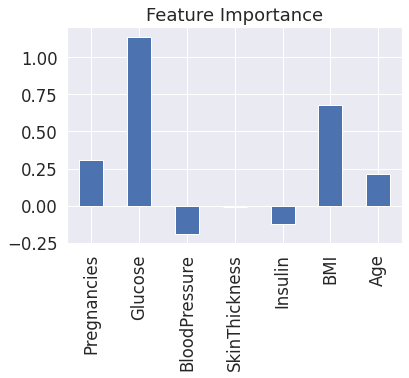

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Without Insulin

In [ ]:
data_clean_ins = data_clean.drop(columns = "Insulin")

In [ ]:
#Spliting the data
X = data_clean_ins[data_clean_ins.columns[:6]]
y = data_clean_ins.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
data_clean_ins.columns[:6]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'Age'],
      dtype='object')

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean_ins[data_clean_ins.columns[:6]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg_ins = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg_ins.fit(X_train,y_train);

log_reg_pred_ins = log_reg_ins.predict(X_test)

log_reg_ins_score = log_reg_ins.score(X_test,y_test)
print(log_reg_ins_score)

0.8051948051948052


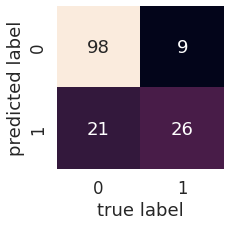

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, log_reg_pred_ins):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_reg_pred_ins),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, log_reg_pred_ins)

## Without BloodPressure

In [ ]:
data_clean_bp = data_clean.drop(columns = "BloodPressure")

In [ ]:
#Spliting the data
X = data_clean_bp[data_clean_bp.columns[:6]]
y = data_clean_bp.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
data_clean_bp.columns[:6]

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object')

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean_bp[data_clean_bp.columns[:6]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg_bp = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg_bp.fit(X_train,y_train);

log_reg_pred_bp = log_reg_bp.predict(X_test)

log_reg_bp_score = log_reg_bp.score(X_test,y_test)
print(log_reg_bp_score)

0.7987012987012987


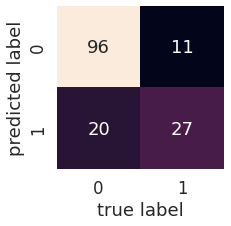

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, log_reg_pred_bp):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_reg_pred_bp),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, log_reg_pred_bp)

## Without Insulin & BloodPressure

In [ ]:
data_clean_ins_bp = data_clean_ins.drop(columns = "BloodPressure")

In [ ]:
#Spliting the data
X = data_clean_ins_bp[data_clean_ins_bp.columns[:5]]
y = data_clean_ins_bp.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
data_clean_ins_bp.columns[:5]

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean_ins_bp[data_clean_ins_bp.columns[:5]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg_ins_bp = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg_ins_bp.fit(X_train,y_train);

log_reg_pred_ins_bp = log_reg_ins_bp.predict(X_test)

log_reg_ins_bp_score = log_reg_ins_bp.score(X_test,y_test)
print(log_reg_ins_bp_score)

0.8051948051948052


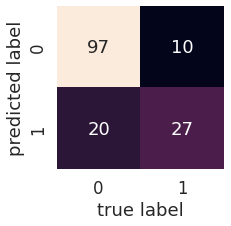

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, log_reg_pred_ins_bp):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_reg_pred_ins_bp),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, log_reg_pred_ins_bp)

## Without BP, Insulin, SkinThickness

In [ ]:
data_clean_ins_bp_st = data_clean.drop(columns = ["SkinThickness", "Insulin", "BloodPressure"])

In [ ]:
#Spliting the data
X = data_clean_ins_bp_st[data_clean_ins_bp_st.columns[:4]]
y = data_clean_ins_bp_st.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
data_clean_ins_bp_st.columns[:4]

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean_ins_bp_st[data_clean_ins_bp_st.columns[:4]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg_ins_bp_st = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg_ins_bp_st.fit(X_train,y_train);

log_reg_pred_ins_bp_st = log_reg_ins_bp_st.predict(X_test)

log_reg_ins_bp_st_score = log_reg_ins_bp_st.score(X_test,y_test)
print(log_reg_ins_bp_st_score)

0.8051948051948052


In [ ]:
log_reg_ins_bp_st

LogisticRegression(random_state=0)

In [ ]:
y_test = pd.Series.ravel(y_test)

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, log_reg_pred_ins_bp_st)

0.19480519480519481

In [ ]:
print(classification_report(y_test, log_reg_pred_ins_bp_st))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



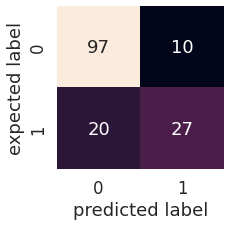

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, log_reg_pred_ins_bp_st):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_reg_pred_ins_bp_st),
                     annot=True,
                     cbar=False)
    plt.xlabel("predicted label")
    plt.ylabel("expected label")
    
plot_conf_mat(y_test, log_reg_pred_ins_bp_st)

## Accuracy

In [ ]:
accuracy = pd.DataFrame({"Normal": log_reg_normal_score,
                            "Fără Insulin": log_reg_ins_score,
                            "Fără BloodPressure": log_reg_bp_score,
                           "Fără Insulin & BloodPressure": log_reg_ins_bp_score,
                           "Fără Insulin, BloodPressure & SkinThickness": log_reg_ins_bp_st_score,
                            },index=["Acuratețe"])

In [ ]:
accuracy

,Normal,Fără Insulin,Fără BloodPressure,Fără Insulin & BloodPressure,"Fără Insulin, BloodPressure & SkinThickness"
Acuratețe,0.792208,0.805195,0.798701,0.805195,0.805195


# Loading and saving the model

In [ ]:
import pickle

# Save trained model to file. 
pickle.dump([log_reg_ins_bp_st, scaler], open("diabetes.pkl", "wb"))  #Serialize the object and convert it into a “byte stream”

In [ ]:
#Load the model 

loaded_model, scaler = pickle.load(open("diabetes.pkl", "rb")) #deserealize
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8051948051948052

**Making predictions on new data**

In [ ]:
data = {'Pregnancies': [0], 'Glucose': [200], 'BMI': [37], 'Age': [26]}
row_df = pd.DataFrame.from_dict(data)
row_df = scaler.transform(row_df)

In [ ]:
# Pregnancies: 0, Glucose: 200, BMI: 37, Age: 26

prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob*100}")

The probability of you having Diabetes is 86.8761758407928


In [ ]:
loaded_model.predict(row_df)[0]

1

In [ ]:
loaded_model.predict_proba(row_df)

array([[0.13123824, 0.86876176]])

In [ ]:
loaded_model.predict(row_df)

array([1])

In [ ]:
data2 = {'Pregnancies': [0], 'Glucose': [120], 'BMI': [19], 'Age': [20]}
row_df2 = pd.DataFrame.from_dict(data2)
row_df2 = scaler.transform(row_df2)

In [ ]:
# Pregnancies: 0, Glucose: 120, BMI: 19, Age: 20

prob2 = loaded_model.predict_proba(row_df2)[0][1]
print(f"The probability of you having Diabetes is {prob2*100}")

The probability of you having Diabetes is 7.024760372963071


In [ ]:
loaded_model.predict(row_df2)[0]

0

In [ ]:
loaded_model.predict_proba(row_df2)

array([[0.9297524, 0.0702476]])